In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_recall_fscore_support, f1_score
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('diabetes_pm_in.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#null values
data["Glucose"] = data['Glucose'].replace(0, np.nan)
data["BloodPressure"] = data['BloodPressure'].replace(0, np.nan)
data["SkinThickness"] = data['Glucose'].replace(0, np.nan)
data["Insulin"] = data['BloodPressure'].replace(0, np.nan)
data["BMI"] = data['BMI'].replace(0, np.nan)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             763 non-null    float64
 4   Insulin                   733 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,763.000000,733.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,121.686763,72.405184,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,30.535641,12.382158,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,99.000000,64.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,117.000000,72.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,141.000000,80.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
from sklearn.preprocessing import StandardScaler
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [7]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

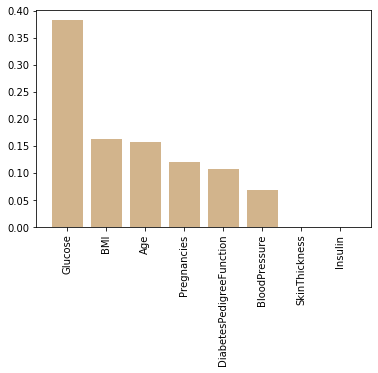

In [8]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='tan')
plt.xticks(rotation='vertical')
plt.show()

# Data Preprocessing 

In [29]:
data = data.dropna(subset=['Glucose', 'SkinThickness'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             728 non-null    float64
 3   SkinThickness             763 non-null    float64
 4   Insulin                   728 non-null    float64
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 59.6 KB


In [11]:
data.drop("SkinThickness", axis=1, inplace=True)
data.drop("Insulin", axis=1, inplace=True)

In [13]:
X_train.shape

(537, 6)

In [12]:
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#print(X_test.info())

xy_test = pd.merge(X_test, y_test, left_index=True, right_index=True)
xy_test  = xy_test.dropna()


X_test = xy_test.drop("Outcome", axis=1)
y_test = xy_test["Outcome"]



imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(X_train)


#print(X_test.info())

array([[0.0000e+00, 1.5100e+02, 9.0000e+01, 4.2100e+01, 3.7100e-01,
        2.1000e+01],
       [1.0000e+00, 8.3000e+01, 6.8000e+01, 1.8200e+01, 6.2400e-01,
        2.7000e+01],
       [2.0000e+00, 1.2200e+02, 7.0000e+01, 3.6800e+01, 3.4000e-01,
        2.7000e+01],
       ...,
       [4.0000e+00, 9.4000e+01, 6.5000e+01, 2.4700e+01, 1.4800e-01,
        2.1000e+01],
       [1.1000e+01, 8.5000e+01, 7.4000e+01, 3.0100e+01, 3.0000e-01,
        3.5000e+01],
       [5.0000e+00, 1.3600e+02, 8.2000e+01, 3.1275e+01, 6.4000e-01,
        6.9000e+01]])

### Resampling Techniques

In [32]:
class_count_0, class_count_1 = data['Outcome'].value_counts()
print(class_count_0, class_count_1)

497 266


In [33]:
class_0 = data[data['Outcome'] == 0]
class_1 = data[data['Outcome'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (497, 9)
class 1: (266, 9)


### 1. Random Under-Sampling 

#### Removing some observations of the majority class.

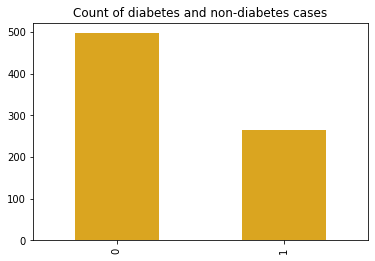

In [34]:
data['Outcome'].value_counts().plot(kind='bar', title='count (target)',  color = 'goldenrod')
plt.title("Count of diabetes and non-diabetes cases")
#plt.savefig("count 01.png")

total class of 1 and0: 1    266
0    266
Name: Outcome, dtype: int64


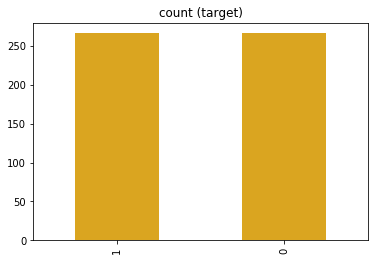

In [35]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Outcome'].value_counts())# plot the count after under-sampeling
test_under['Outcome'].value_counts().plot(kind='bar', title='count (target)',  color = 'goldenrod')

In [38]:

x_under = test_under.drop("Outcome", axis=1)
y_under = test_under["Outcome"]

X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(x_under, y_under, test_size = 0.33, random_state = 0)

#print(X_test.info())

xy_test_un = pd.merge(X_test_un, y_test_un, left_index=True, right_index=True)
xy_test_un  = xy_test_un.dropna()


X_test_un = xy_test_un.drop("Outcome", axis=1)
y_test_un = xy_test_un["Outcome"]



imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(X_train_un)


array([[  3.   ,  74.   ,  68.   , ...,  29.7  ,   0.293,  23.   ],
       [  2.   ,  83.   ,  66.   , ...,  32.2  ,   0.497,  22.   ],
       [  7.   , 150.   ,  66.   , ...,  34.7  ,   0.718,  42.   ],
       ...,
       [  6.   , 165.   ,  68.   , ...,  33.6  ,   0.631,  49.   ],
       [  3.   , 139.   ,  54.   , ...,  25.6  ,   0.402,  22.   ],
       [  3.   ,  83.   ,  58.   , ...,  34.3  ,   0.336,  25.   ]])

### 2. Random Oversampling

total class of 1 and 0: 1    266
0    266
Name: Outcome, dtype: int64


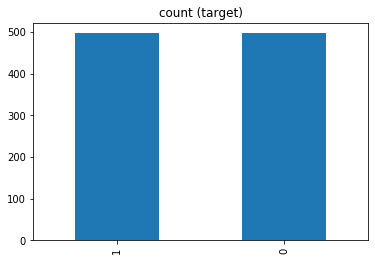

In [39]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_under['Outcome'].value_counts())# plot the count after under-sampeling
test_over['Outcome'].value_counts().plot(kind='bar', title='count (target)')

In [40]:
x_over = test_over.drop("Outcome", axis=1)
y_over = test_over["Outcome"]

X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(x_over, y_over, test_size = 0.3, random_state = 0)

#print(X_test.info())

xy_test_ov = pd.merge(X_test_un, y_test_un, left_index=True, right_index=True)
xy_test_ov  = xy_test_ov.dropna()


X_test_ov = xy_test_ov.drop("Outcome", axis=1)
y_test_ov = xy_test_ov["Outcome"]



imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(X_train_ov)

array([[1.00e+00, 8.10e+01, 7.20e+01, ..., 2.66e+01, 2.83e-01, 2.40e+01],
       [5.00e+00, 1.89e+02, 6.40e+01, ..., 3.12e+01, 5.83e-01, 2.90e+01],
       [3.00e+00, 1.25e+02, 5.80e+01, ..., 3.16e+01, 1.51e-01, 2.40e+01],
       ...,
       [7.00e+00, 1.79e+02, 9.50e+01, ..., 3.42e+01, 1.64e-01, 6.00e+01],
       [1.00e+00, 1.51e+02, 6.00e+01, ..., 2.61e+01, 1.79e-01, 2.20e+01],
       [0.00e+00, 1.37e+02, 6.80e+01, ..., 2.48e+01, 1.43e-01, 2.10e+01]])

# 1

##  Imbalanced-learn python module

In [14]:
import imblearn

In [15]:
x = data.drop("Outcome", axis=1)
y = data["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [16]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC(probability=True))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())
model_pipeline.append(XGBClassifier())

def train_and_evaluate(model, train, train_y, test, test_y, eq=None, train_model=True, threshold=0.5):
    r=[]
    a=[]
    auc=[]
    for i in range(3):
        if train_model:
            model.fit(train, train_y)

        results = model.predict_proba(test)
        proba = results[:,1]
        results = (results[:,1] > threshold).astype(int)


        cm=confusion_matrix(test_y, results)

        acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][1]+cm[1][0])
        roc=roc_auc_score(test_y, proba)
        recall=precision_recall_fscore_support(test_y, results)[1][1]
        a.append(acc)
        r.append(recall)
        auc.append(roc)
    #print(classification_report(test_y, results))
    print('Recall :', str(round(sum(r)/3,4)), '; Accuracy :',str(round(sum(a)/3,4)),'; ROC AUC :',str(round(sum(auc)/3,4)))    
    return proba


def training_models (model_pipeline, X_train, y_train, X_test, y_test):
    
    model_names = ['Logistic Regression','SVC','K-Neighbors Classifier','Decision Tree','Random Forest',
                   'Gaussian Naive Bayes', 'XGBClassifier']
    
    for i in range(len(model_pipeline)):
        if model_names[i] == 'Logistic Regression':
            print(model_names[i])
            lg_pr=train_and_evaluate(model_pipeline[i], X_train, y_train, X_test, y_test)
            
        else:
            print(model_names[i])
            train_and_evaluate(model_pipeline[i], X_train, y_train, X_test, y_test)

### 3. Random under-sampling with imblearn

In [21]:
from imblearn.under_sampling import RandomUnderSampler

In [22]:
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

#split train test
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x, y, test_size = 0.3, random_state = 0)


xy_test_rus= pd.merge(X_test_rus, y_test_rus, left_index=True, right_index=True)
xy_test_rus = xy_test_rus.dropna()


X_test_rus = xy_test_rus.drop("Outcome", axis=1)
y_test_rus = xy_test_rus["Outcome"]

imputer = KNNImputer(n_neighbors=4, weights="uniform")
impute_data = X_train_rus
X_train_rus = pd.DataFrame(np.round(imputer.fit_transform(impute_data)),columns = impute_data.columns)


rus = RandomUnderSampler(random_state=42, replacement=True)
x_train_rus, y_train_rus = rus.fit_resample(X_train_rus, y_train_rus)

print('original dataset shape:', y_train.shape)
print('Resample dataset shape', y_train_rus.shape)

training_models (model_pipeline, x_train_rus, y_train_rus, X_test_rus, y_test_rus)



original dataset shape: (537,)
Resample dataset shape (388,)
Logistic Regression
Recall : 0.597 ; Accuracy : 0.7169 ; ROC AUC : 0.7958
SVC
Recall : 0.5821 ; Accuracy : 0.723 ; ROC AUC : 0.8147
K-Neighbors Classifier
Recall : 0.6567 ; Accuracy : 0.7123 ; ROC AUC : 0.7789
Decision Tree
Recall : 0.7015 ; Accuracy : 0.6804 ; ROC AUC : 0.6863
Random Forest
Recall : 0.7562 ; Accuracy : 0.7412 ; ROC AUC : 0.8259
Gaussian Naive Bayes
Recall : 0.597 ; Accuracy : 0.7215 ; ROC AUC : 0.8162
XGBClassifier
Recall : 0.7015 ; Accuracy : 0.7169 ; ROC AUC : 0.8091


In [23]:
training_models (model_pipeline, x_train_rus, y_train_rus, X_test_rus, y_test_rus)
### RANDOM UNDERSAMPLE

Logistic Regression
Recall : 0.597 ; Accuracy : 0.7169 ; ROC AUC : 0.7958
SVC
Recall : 0.5821 ; Accuracy : 0.7215 ; ROC AUC : 0.8147
K-Neighbors Classifier
Recall : 0.6567 ; Accuracy : 0.7123 ; ROC AUC : 0.7789
Decision Tree
Recall : 0.7065 ; Accuracy : 0.6743 ; ROC AUC : 0.6833
Random Forest
Recall : 0.7562 ; Accuracy : 0.7382 ; ROC AUC : 0.8281
Gaussian Naive Bayes
Recall : 0.597 ; Accuracy : 0.7215 ; ROC AUC : 0.8162
XGBClassifier
Recall : 0.7015 ; Accuracy : 0.7169 ; ROC AUC : 0.8091


### 4. Random over-sampling with imblearn

In [17]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
#split train test
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x, y, test_size = 0.3, random_state = 0)

#print(X_test.info())

#merge back test to delete nan
xy_test_rus= pd.merge(X_test_rus, y_test_rus, left_index=True, right_index=True)
xy_test_rus = xy_test_rus.dropna()

#split again
X_test_rus = xy_test_rus.drop("Outcome", axis=1)
y_test_rus = xy_test_rus["Outcome"]


#impute missing values in train
imputer = KNNImputer(n_neighbors=4, weights="uniform")
#X_train_rus = imputer.fit_transform(X_train_rus)
impute_data = X_train_rus
X_train_rus = pd.DataFrame(np.round(imputer.fit_transform(impute_data)),columns = impute_data.columns)

#sampling
ros = RandomOverSampler(random_state=42)

x_train_rus, y_train_rus = ros.fit_resample(X_train_rus, y_train_rus)

print('original dataset shape:', y_train.shape)
print('Resample dataset shape', y_train_rus.shape)

training_models (model_pipeline, x_train_rus, y_train_rus, X_test_rus, y_test_rus)

original dataset shape: (537,)
Resample dataset shape (686,)
Logistic Regression
Recall : 0.6418 ; Accuracy : 0.726 ; ROC AUC : 0.8119
SVC
Recall : 0.597 ; Accuracy : 0.7108 ; ROC AUC : 0.8144
K-Neighbors Classifier
Recall : 0.6567 ; Accuracy : 0.7169 ; ROC AUC : 0.7322
Decision Tree
Recall : 0.5473 ; Accuracy : 0.7549 ; ROC AUC : 0.6969
Random Forest
Recall : 0.6169 ; Accuracy : 0.7717 ; ROC AUC : 0.8299
Gaussian Naive Bayes
Recall : 0.6119 ; Accuracy : 0.7397 ; ROC AUC : 0.8263
XGBClassifier
Recall : 0.7313 ; Accuracy : 0.7945 ; ROC AUC : 0.836


### 5. Under-sampling: Tomek links 

### 5.1. Tomek links (majority)

Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

Tomek’s link exists if the two samples are the nearest neighbors of each other

In [26]:
from imblearn.under_sampling import TomekLinks

In [36]:
#split train test
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x, y, test_size = 0.3, random_state = 0)

#print(X_test.info())

#merge back test to delete nan
xy_test_rus= pd.merge(X_test_rus, y_test_rus, left_index=True, right_index=True)
xy_test_rus = xy_test_rus.dropna()

#split again
X_test_rus = xy_test_rus.drop("Outcome", axis=1)
y_test_rus = xy_test_rus["Outcome"]


#impute missing values in train
imputer = KNNImputer(n_neighbors=4, weights="uniform")
#X_train_rus = imputer.fit_transform(X_train_rus)
impute_data = X_train_rus
X_train_rus = pd.DataFrame(np.round(imputer.fit_transform(impute_data)),columns = impute_data.columns)

#sampling
tl_maj = TomekLinks(sampling_strategy='majority')

x_train_rus, y_train_rus = tl_maj.fit_resample(X_train_rus, y_train_rus)

print('original dataset shape:', y_train.shape)
print('Resample dataset shape', y_train_rus.shape)

training_models (model_pipeline, x_train_rus, y_train_rus, X_test_rus, y_test_rus)

original dataset shape: (537,)
Resample dataset shape (492,)
Logistic Regression
Recall : 0.5821 ; Accuracy : 0.7534 ; ROC AUC : 0.8095
SVC
Recall : 0.5373 ; Accuracy : 0.7534 ; ROC AUC : 0.8063
K-Neighbors Classifier
Recall : 0.6269 ; Accuracy : 0.7443 ; ROC AUC : 0.7626
Decision Tree
Recall : 0.6915 ; Accuracy : 0.7291 ; ROC AUC : 0.7186
Random Forest
Recall : 0.6318 ; Accuracy : 0.7778 ; ROC AUC : 0.8262
Gaussian Naive Bayes
Recall : 0.597 ; Accuracy : 0.7443 ; ROC AUC : 0.8232
XGBClassifier
Recall : 0.6716 ; Accuracy : 0.7671 ; ROC AUC : 0.8267


### 5.2. Under-sampling: Tomek links (majority)

In [28]:
#split train test
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x, y, test_size = 0.3, random_state = 0)

#print(X_test.info())

#merge back test to delete nan
xy_test_rus= pd.merge(X_test_rus, y_test_rus, left_index=True, right_index=True)
xy_test_rus = xy_test_rus.dropna()

#split again
X_test_rus = xy_test_rus.drop("Outcome", axis=1)
y_test_rus = xy_test_rus["Outcome"]


#impute missing values in train
imputer = KNNImputer(n_neighbors=4, weights="uniform")
#X_train_rus = imputer.fit_transform(X_train_rus)
impute_data = X_train_rus
X_train_rus = pd.DataFrame(np.round(imputer.fit_transform(impute_data)),columns = impute_data.columns)

#sampling
tl_all = TomekLinks(sampling_strategy='all')


x_train_rus, y_train_rus = tl_all.fit_resample(X_train_rus, y_train_rus)

print('original dataset shape:', y_train.shape)
print('Resample dataset shape', y_train_rus.shape)

training_models (model_pipeline, x_train_rus, y_train_rus, X_test_rus, y_test_rus)

original dataset shape: (537,)
Resample dataset shape (447,)
Logistic Regression
Recall : 0.5075 ; Accuracy : 0.7489 ; ROC AUC : 0.7982
SVC
Recall : 0.4925 ; Accuracy : 0.7565 ; ROC AUC : 0.801
K-Neighbors Classifier
Recall : 0.5373 ; Accuracy : 0.7626 ; ROC AUC : 0.7705
Decision Tree
Recall : 0.6517 ; Accuracy : 0.7656 ; ROC AUC : 0.7338
Random Forest
Recall : 0.5423 ; Accuracy : 0.7778 ; ROC AUC : 0.8281
Gaussian Naive Bayes
Recall : 0.5672 ; Accuracy : 0.7626 ; ROC AUC : 0.8253
XGBClassifier
Recall : 0.5373 ; Accuracy : 0.758 ; ROC AUC : 0.8289


### 6. Near Miss Undersampling

NearMiss-1 selects examples from the majority class that have the smallest average distance to the three closest examples from the minority class. NearMiss-2 selects examples from the majority class that have the smallest average distance to the three furthest examples from the minority class. NearMiss-3 involves selecting a given number of majority class examples for each example in the minority class that are closest.

Here, distance is determined in feature space using Euclidean distance or similar.

NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
NearMiss-3: Majority class examples with minimum distance to each minority class example.
The NearMiss-3 seems desirable, given that it will only keep those majority class examples that are on the decision boundary.

We can implement the Near Miss methods using the NearMiss imbalanced-learn class.

The type of near-miss strategy used is defined by the “version” argument, which by default is set to 1 for NearMiss-1, but can be set to 2 or 3 for the other two methods

### 6.1 NearMiss-1

In [135]:
from imblearn.under_sampling import NearMiss

In [147]:
nearmiss_1 = NearMiss(version=1)
x_nm_1, y_nm_1 = nearmiss_1.fit_resample(x, y)

print('Original dataset shape', y.shape)
print('Resample dataset shape', y_nm_1.shape)

Original dataset shape (768,)
Resample dataset shape (536,)


### 6.2 NearMiss-2

In [136]:
nearmiss_2 = NearMiss(version=2)
x_nm_2, y_nm_2 = nearmiss_2.fit_resample(x, y)

print('Original dataset shape', y.shape)
print('Resample dataset shape', y_nm_2.shape)

Original dataset shape (768,)
Resample dataset shape (536,)


### 6.3 NearMiss-3

In [37]:
from imblearn.under_sampling import NearMiss


#split train test
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x, y, test_size = 0.3, random_state = 0)

#print(X_test.info())

#merge back test to delete nan
xy_test_rus= pd.merge(X_test_rus, y_test_rus, left_index=True, right_index=True)
xy_test_rus = xy_test_rus.dropna()

#split again
X_test_rus = xy_test_rus.drop("Outcome", axis=1)
y_test_rus = xy_test_rus["Outcome"]


#impute missing values in train
imputer = KNNImputer(n_neighbors=4, weights="uniform")
#X_train_rus = imputer.fit_transform(X_train_rus)
impute_data = X_train_rus
X_train_rus = pd.DataFrame(np.round(imputer.fit_transform(impute_data)),columns = impute_data.columns)

#sampling
nearmiss_3 = NearMiss(version=3)

x_train_rus, y_train_rus = nearmiss_3.fit_resample(X_train_rus, y_train_rus)

print('original dataset shape:', y_train.shape)
print('Resample dataset shape', y_train_rus.shape)

training_models (model_pipeline, x_train_rus, y_train_rus, X_test_rus, y_test_rus)

/Users/juliasulstarova/anaconda3/lib/python3.6/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


original dataset shape: (537,)
Resample dataset shape (371,)
Logistic Regression
Recall : 0.6269 ; Accuracy : 0.7397 ; ROC AUC : 0.8068
SVC
Recall : 0.5373 ; Accuracy : 0.7489 ; ROC AUC : 0.806
K-Neighbors Classifier
Recall : 0.5373 ; Accuracy : 0.726 ; ROC AUC : 0.6915
Decision Tree
Recall : 0.5373 ; Accuracy : 0.6606 ; ROC AUC : 0.6261
Random Forest
Recall : 0.607 ; Accuracy : 0.758 ; ROC AUC : 0.7915
Gaussian Naive Bayes
Recall : 0.5672 ; Accuracy : 0.7671 ; ROC AUC : 0.8073
XGBClassifier
Recall : 0.597 ; Accuracy : 0.7352 ; ROC AUC : 0.7768


### 7. SMOTE

In [30]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE()
from imblearn.under_sampling import NearMiss
#split train test
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x, y, test_size = 0.3, random_state = 0)

#print(X_test.info())

#merge back test to delete nan
xy_test_rus= pd.merge(X_test_rus, y_test_rus, left_index=True, right_index=True)
xy_test_rus = xy_test_rus.dropna()

#split again
X_test_rus = xy_test_rus.drop("Outcome", axis=1)
y_test_rus = xy_test_rus["Outcome"]


#impute missing values in train
imputer = KNNImputer(n_neighbors=4, weights="uniform")
#X_train_rus = imputer.fit_transform(X_train_rus)
impute_data = X_train_rus
X_train_rus = pd.DataFrame(np.round(imputer.fit_transform(impute_data)),columns = impute_data.columns)

#sampling

x_train_rus, y_train_rus = smote.fit_resample(X_train_rus, y_train_rus)

print('original dataset shape:', y_train.shape)
print('Resample dataset shape', y_train_rus.shape)

training_models (model_pipeline, x_train_rus, y_train_rus, X_test_rus, y_test_rus)

original dataset shape: (537,)
Resample dataset shape (686,)
Logistic Regression
Recall : 0.6418 ; Accuracy : 0.7169 ; ROC AUC : 0.8108
SVC
Recall : 0.592 ; Accuracy : 0.7215 ; ROC AUC : 0.8126
K-Neighbors Classifier
Recall : 0.6418 ; Accuracy : 0.7169 ; ROC AUC : 0.7475
Decision Tree
Recall : 0.7065 ; Accuracy : 0.6773 ; ROC AUC : 0.6855
Random Forest
Recall : 0.8209 ; Accuracy : 0.6758 ; ROC AUC : 0.8097
Gaussian Naive Bayes
Recall : 0.6269 ; Accuracy : 0.726 ; ROC AUC : 0.8308
XGBClassifier
Recall : 0.8806 ; Accuracy : 0.6712 ; ROC AUC : 0.7985


### 8. Pipeline

oversampling the minority class, then undersampling the majority class

In [32]:
from imblearn.pipeline import Pipeline

In [33]:
over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.8)

In [34]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [39]:
from imblearn.under_sampling import NearMiss
#split train test
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x, y, test_size = 0.3, random_state = 0)




xy_test_rus= pd.merge(X_test_rus, y_test_rus, left_index=True, right_index=True)
xy_test_rus = xy_test_rus.dropna()


X_test_rus = xy_test_rus.drop("Outcome", axis=1)
y_test_rus = xy_test_rus["Outcome"]


imputer = KNNImputer(n_neighbors=4, weights="uniform")
impute_data = X_train_rus
X_train_rus = pd.DataFrame(np.round(imputer.fit_transform(impute_data)),columns = impute_data.columns)

#sampling

x_train_rus, y_train_rus = pipeline.fit_resample(X_train_rus, y_train_rus)

print('original dataset shape:', y_train.shape)
print('Resample dataset shape', y_train_rus.shape)

training_models (model_pipeline, x_train_rus, y_train_rus, X_test_rus, y_test_rus)

original dataset shape: (537,)
Resample dataset shape (461,)
Logistic Regression
Recall : 0.597 ; Accuracy : 0.7397 ; ROC AUC : 0.8071
SVC
Recall : 0.5373 ; Accuracy : 0.7489 ; ROC AUC : 0.8104
K-Neighbors Classifier
Recall : 0.6269 ; Accuracy : 0.7489 ; ROC AUC : 0.7526
Decision Tree
Recall : 0.6766 ; Accuracy : 0.6728 ; ROC AUC : 0.6738
Random Forest
Recall : 0.7114 ; Accuracy : 0.7747 ; ROC AUC : 0.816
Gaussian Naive Bayes
Recall : 0.597 ; Accuracy : 0.7443 ; ROC AUC : 0.8266
XGBClassifier
Recall : 0.7164 ; Accuracy : 0.7306 ; ROC AUC : 0.804


## Choosing best sampling method

# Train + Predictions

In [145]:
from sklearn.model_selection import train_test_split

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_recall_fscore_support, f1_score
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [110]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC(probability=True))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())
model_pipeline.append(XGBClassifier())

In [111]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC(probability=True))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())
model_pipeline.append(XGBClassifier())

def train_and_evaluate(model, train, train_y, test, test_y, eq=None, train_model=True, threshold=0.5):
    r=[]
    a=[]
    auc=[]
    for i in range(3):
        if train_model:
            model.fit(train, train_y)

        results = model.predict_proba(test)
        proba = results[:,1]
        results = (results[:,1] > threshold).astype(int)


        cm=confusion_matrix(test_y, results)

        acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][1]+cm[1][0])
        roc=roc_auc_score(test_y, proba)
        recall=precision_recall_fscore_support(test_y, results)[1][1]
        a.append(acc)
        r.append(recall)
        auc.append(roc)
    #print(classification_report(test_y, results))
    print('Recall :', str(round(sum(r)/3,4)), '; Accuracy :',str(round(sum(a)/3,4)),'; ROC AUC :',str(round(sum(auc)/3,4)))    
    return proba


def training_models (model_pipeline, X_train, y_train, X_test, y_test):
    
    model_names = ['Logistic Regression','SVC','K-Neighbors Classifier','Decision Tree','Random Forest',
                   'Gaussian Naive Bayes', 'XGBClassifier']
    
    for i in range(len(model_pipeline)):
        if model_names[i] == 'Logistic Regression':
            print(model_names[i])
            lg_pr=train_and_evaluate(model_pipeline[i], X_train, y_train, X_test, y_test)
            
        else:
            print(model_names[i])
            train_and_evaluate(model_pipeline[i], X_train, y_train, X_test, y_test)

In [112]:
training_models(model_pipeline, X_train, y_train, X_test, y_test)

Logistic Regression
Recall : 0.5357 ; Accuracy : 0.7913 ; ROC AUC : 0.8462
SVC
Recall : 0.4921 ; Accuracy : 0.7638 ; ROC AUC : 0.8201
K-Neighbors Classifier
Recall : 0.4881 ; Accuracy : 0.7323 ; ROC AUC : 0.7339
Decision Tree
Recall : 0.5357 ; Accuracy : 0.7126 ; ROC AUC : 0.6679
Random Forest
Recall : 0.5397 ; Accuracy : 0.7717 ; ROC AUC : 0.8314
Gaussian Naive Bayes
Recall : 0.5119 ; Accuracy : 0.748 ; ROC AUC : 0.7951
XGBClassifier
Recall : 0.5714 ; Accuracy : 0.7638 ; ROC AUC : 0.8247


In [151]:
# UNDERSAMPLING 
training_models(model_pipeline, X_train_un, y_train_un, X_test_un, y_test_un)

Logistic Regression
Recall : 0.7159 ; Accuracy : 0.7571 ; ROC AUC : 0.7939
SVC
Recall : 0.6818 ; Accuracy : 0.7232 ; ROC AUC : 0.8145
K-Neighbors Classifier
Recall : 0.6705 ; Accuracy : 0.6949 ; ROC AUC : 0.7515
Decision Tree
Recall : 0.5985 ; Accuracy : 0.6911 ; ROC AUC : 0.6906
Random Forest
Recall : 0.6629 ; Accuracy : 0.7213 ; ROC AUC : 0.8264
Gaussian Naive Bayes
Recall : 0.7045 ; Accuracy : 0.7797 ; ROC AUC : 0.8347
XGBClassifier
Recall : 0.6364 ; Accuracy : 0.7119 ; ROC AUC : 0.8361


In [106]:
model = SVC(probability=True)
model.fit(X_train, y_train)

SVC(probability=True)

In [107]:
model.predict_proba(X_test)

array([[0.06078994, 0.93921006],
       [0.85586088, 0.14413912],
       [0.88451751, 0.11548249],
       [0.22175784, 0.77824216],
       [0.82639558, 0.17360442],
       [0.92433982, 0.07566018],
       [0.35340077, 0.64659923],
       [0.12224705, 0.87775295],
       [0.73327153, 0.26672847],
       [0.74371657, 0.25628343],
       [0.34925359, 0.65074641],
       [0.06459462, 0.93540538],
       [0.77141419, 0.22858581],
       [0.9219159 , 0.0780841 ],
       [0.86043085, 0.13956915],
       [0.80671801, 0.19328199],
       [0.11559293, 0.88440707],
       [0.90426441, 0.09573559],
       [0.56165961, 0.43834039],
       [0.85713517, 0.14286483],
       [0.42072   , 0.57928   ],
       [0.72001714, 0.27998286],
       [0.78385123, 0.21614877],
       [0.84873734, 0.15126266],
       [0.91945582, 0.08054418],
       [0.64062586, 0.35937414],
       [0.87825   , 0.12175   ],
       [0.28636201, 0.71363799],
       [0.80074538, 0.19925462],
       [0.82204687, 0.17795313],
       [0.

In [152]:
# OVERSAMPLING 
training_models(model_pipeline, X_train_ov, y_train_ov, X_test_ov, y_test_ov)

Logistic Regression
Recall : 0.7914 ; Accuracy : 0.7758 ; ROC AUC : 0.8326
SVC
Recall : 0.7178 ; Accuracy : 0.698 ; ROC AUC : 0.8094
K-Neighbors Classifier
Recall : 0.7914 ; Accuracy : 0.7273 ; ROC AUC : 0.8097
Decision Tree
Recall : 0.8773 ; Accuracy : 0.8323 ; ROC AUC : 0.8329
Random Forest
Recall : 0.9018 ; Accuracy : 0.8596 ; ROC AUC : 0.9469
Gaussian Naive Bayes
Recall : 0.6503 ; Accuracy : 0.7333 ; ROC AUC : 0.8199
XGBClassifier
Recall : 0.8712 ; Accuracy : 0.8394 ; ROC AUC : 0.8944


In [153]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size = 0.33, random_state = 0)

In [158]:
 y_test_rus.shape

(177,)

In [159]:
# Random UNDERSAMPLING 
training_models(model_pipeline, X_train_rus, y_train_rus, X_test_rus, y_test_rus)

Logistic Regression
Recall : 0.7045 ; Accuracy : 0.7345 ; ROC AUC : 0.8036
SVC
Recall : 0.6932 ; Accuracy : 0.6893 ; ROC AUC : 0.788
K-Neighbors Classifier
Recall : 0.7159 ; Accuracy : 0.678 ; ROC AUC : 0.766
Decision Tree
Recall : 0.7008 ; Accuracy : 0.7533 ; ROC AUC : 0.753
Random Forest
Recall : 0.7008 ; Accuracy : 0.7646 ; ROC AUC : 0.8481
Gaussian Naive Bayes
Recall : 0.6932 ; Accuracy : 0.7345 ; ROC AUC : 0.8018
XGBClassifier
Recall : 0.7273 ; Accuracy : 0.7571 ; ROC AUC : 0.8347


In [160]:
# Random OVERSAMPLING
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size = 0.33, random_state = 0)


training_models(model_pipeline, X_train_ros, y_train_ros, X_test_ros, y_test_ros)

Logistic Regression
Recall : 0.7848 ; Accuracy : 0.7788 ; ROC AUC : 0.8631
SVC
Recall : 0.7215 ; Accuracy : 0.7242 ; ROC AUC : 0.8317
K-Neighbors Classifier
Recall : 0.8038 ; Accuracy : 0.7182 ; ROC AUC : 0.8127
Decision Tree
Recall : 0.8903 ; Accuracy : 0.8232 ; ROC AUC : 0.826
Random Forest
Recall : 0.903 ; Accuracy : 0.8505 ; ROC AUC : 0.9521
Gaussian Naive Bayes
Recall : 0.7152 ; Accuracy : 0.7576 ; ROC AUC : 0.8361
XGBClassifier
Recall : 0.9177 ; Accuracy : 0.8424 ; ROC AUC : 0.9204


In [161]:
#Tomek Links
X_train_tl1, X_test_tl1, y_train_tl1, y_test_tl1 = train_test_split(x_tl_maj, y_tl_maj, test_size = 0.33, random_state = 0)

training_models(model_pipeline, X_train_tl1, y_train_tl1, X_test_tl1, y_test_tl1)

Logistic Regression
Recall : 0.5729 ; Accuracy : 0.7754 ; ROC AUC : 0.8798
SVC
Recall : 0.5347 ; Accuracy : 0.7556 ; ROC AUC : 0.8548
K-Neighbors Classifier
Recall : 0.5833 ; Accuracy : 0.75 ; ROC AUC : 0.8067
Decision Tree
Recall : 0.6111 ; Accuracy : 0.7218 ; ROC AUC : 0.7044
Random Forest
Recall : 0.5972 ; Accuracy : 0.7754 ; ROC AUC : 0.8621
Gaussian Naive Bayes
Recall : 0.6562 ; Accuracy : 0.7669 ; ROC AUC : 0.8499
XGBClassifier
Recall : 0.5729 ; Accuracy : 0.7585 ; ROC AUC : 0.8536


In [162]:
#Tomek Links 2
X_train_tl2, X_test_tl2, y_train_tl2, y_test_tl2 = train_test_split(x_tl_all, y_tl_all, test_size = 0.33, random_state = 0)

training_models(model_pipeline, X_train_tl2, y_train_tl2, X_test_tl2, y_test_tl2)

Logistic Regression
Recall : 0.6119 ; Accuracy : 0.8165 ; ROC AUC : 0.8665
SVC
Recall : 0.5672 ; Accuracy : 0.8028 ; ROC AUC : 0.8538
K-Neighbors Classifier
Recall : 0.5821 ; Accuracy : 0.7936 ; ROC AUC : 0.8292
Decision Tree
Recall : 0.6169 ; Accuracy : 0.7554 ; ROC AUC : 0.7168
Random Forest
Recall : 0.6617 ; Accuracy : 0.815 ; ROC AUC : 0.8557
Gaussian Naive Bayes
Recall : 0.6716 ; Accuracy : 0.7798 ; ROC AUC : 0.843
XGBClassifier
Recall : 0.6866 ; Accuracy : 0.8119 ; ROC AUC : 0.8684


In [163]:
#Near Miss 1
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(x_nm_3, y_nm_3, test_size = 0.33, random_state = 0)

training_models(model_pipeline, X_train_nm, y_train_nm, X_test_nm, y_test_nm)

Logistic Regression
Recall : 0.6364 ; Accuracy : 0.661 ; ROC AUC : 0.7097
SVC
Recall : 0.5644 ; Accuracy : 0.6516 ; ROC AUC : 0.7068
K-Neighbors Classifier
Recall : 0.5568 ; Accuracy : 0.6045 ; ROC AUC : 0.5878
Decision Tree
Recall : 0.5833 ; Accuracy : 0.6215 ; ROC AUC : 0.6213
Random Forest
Recall : 0.5644 ; Accuracy : 0.6196 ; ROC AUC : 0.7031
Gaussian Naive Bayes
Recall : 0.6023 ; Accuracy : 0.6667 ; ROC AUC : 0.7072
XGBClassifier
Recall : 0.5795 ; Accuracy : 0.6441 ; ROC AUC : 0.7026


In [164]:
#SMOTE
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(x_smote, y_smote, test_size = 0.33, random_state = 0)

training_models(model_pipeline, X_train_s, y_train_s, X_test_s, y_test_s)

Logistic Regression
Recall : 0.7532 ; Accuracy : 0.7667 ; ROC AUC : 0.8569
SVC
Recall : 0.7658 ; Accuracy : 0.7485 ; ROC AUC : 0.8349
K-Neighbors Classifier
Recall : 0.8165 ; Accuracy : 0.7242 ; ROC AUC : 0.8079
Decision Tree
Recall : 0.7489 ; Accuracy : 0.7404 ; ROC AUC : 0.7408
Random Forest
Recall : 0.9156 ; Accuracy : 0.8606 ; ROC AUC : 0.9342
Gaussian Naive Bayes
Recall : 0.7089 ; Accuracy : 0.7576 ; ROC AUC : 0.832
XGBClassifier
Recall : 0.8797 ; Accuracy : 0.8273 ; ROC AUC : 0.9133


In [165]:
#SMOTE
X_train_pip, X_test_pip, y_train_pip, y_test_pip = train_test_split(x_pip, y_pip, test_size = 0.33, random_state = 0)

training_models(model_pipeline, X_train_pip, y_train_pip, X_test_pip, y_test_pip)

Logistic Regression
Recall : 0.699 ; Accuracy : 0.7444 ; ROC AUC : 0.8326
SVC
Recall : 0.6764 ; Accuracy : 0.7354 ; ROC AUC : 0.8095
K-Neighbors Classifier
Recall : 0.6893 ; Accuracy : 0.6816 ; ROC AUC : 0.7554
Decision Tree
Recall : 0.7735 ; Accuracy : 0.7294 ; ROC AUC : 0.7326
Random Forest
Recall : 0.7638 ; Accuracy : 0.7474 ; ROC AUC : 0.8218
Gaussian Naive Bayes
Recall : 0.6893 ; Accuracy : 0.7265 ; ROC AUC : 0.7981
XGBClassifier
Recall : 0.7476 ; Accuracy : 0.7309 ; ROC AUC : 0.8132
